## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

What is your research question? What problem is it that you are trying to solve?

### b) Defining the Metric for Success

What will convince you that your project has succeeded?

### c) Understanding the Context 

The background information surrounding the problem or research question.

### d) Recording the Experimental Design

The steps you will take from the beginning to the end of this project.

### e) Data Relevance

Is the provided data relevant to the problem or research question?

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [2]:
# load and preview dataset
df = pd.read_csv('https://bit.ly/MTNTelcoDataset')
df.sample(3)

,recordid,customer_id,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes_2,total_intl_calls_2,total_intl_charge,number_customer_service_calls,churn
10597,10598,37521127.0,18,408,False,8.7,3,False,0,197.0,97,33.49,203.7,107,17.31,202.0,105,9.09,8.7,3,2.35,3,False
8948,8949,24838849.0,48,510,False,8.0,5,True,43,172.0,111,29.24,200.2,64,17.02,233.1,96,10.49,8.0,5,2.16,1,False
453,454,56019011.0,77,510,False,13.7,3,False,0,124.1,92,21.10,214.9,131,18.27,241.3,132,10.86,13.7,3,3.70,0,False


In [ ]:
# load glossary
glossary = pd.read_csv('https://bit.ly/3gTideq',header = None)
glossary

In [4]:
# check dataset shape
df.shape

(12892, 23)

Our dataset has 12,892 records and 23 variables.

We will drop 'recordid' and 'customer_id' since we have no need of them and they would interfere with our analysis.

In [5]:
df.drop(columns = ['recordid', 'customer_id'], inplace = True)

In [6]:
# preview variable datatypes
df.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes_2             float64
total_intl_calls_2                 int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

With the exception of the 'international_plan', 'voice_mail_plan', and 'churn' variables which are boolean, this dataset is numerical.

In [7]:
# check for duplicates
df.duplicated().sum()

7892

7,892 duplicated records are found. We will drop them.

In [8]:
df = df.drop_duplicates()
df.shape

(5000, 21)

In [9]:
# check for missing values
df.isna().sum()

account_length                   0
area_code                        0
international_plan               0
total_intl_minutes               0
total_intl_calls                 0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes_2             0
total_intl_calls_2               0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

No missing values found. We will look at the unique values in each variable just to be safe.

In [10]:
columns = df.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: account_length
Number of unique values: 218
[101 137 103  99 108 117  63  94 138 128 113 140 102  60  96 178  75 106
 158 111  92  42  69  76  72 115  68  97  90  73  54 161 125 194 141  98
 110  70  66  79  61  77 105 159  83  93 163 169  57  85 132 190  39  84
  71 114 135  82  64 112 166 120 187 100  45  43  52  74  40  56 133 119
 131 118 107 109 127  33 145  47  53 148  55 143 170  65 157  89  91 104
 130  80 146  29  78 185 144  59 139  12 150 156  17 176  95 136 165 149
 124  87  51 126  62  48  58  81  36 177  25 171 122  44 167  41 184  88
 151 160 152  49  13 142   3  23  19 154 116 173  24  15  86 147  21 174
 162 186  14   7   1  18  20  11 192 121 134  67 164 180  35 155  32 123
 182 129  38  37  50  27 188 175   5  26   4  31 193 238  28 195 153 201
 216 183 168 222 232 233  22  46  34   8 217   2 200 172  16  30 202 181
  10   6 179 208 215 199 196 209 224 189 243 205   9 210 212 197 225 191
 204 221]

Variable: area_code
Number of unique values: 3
[510 408 415

We can confirm that there are no missing values in this dataset.

An anomaly has been noted: there appears to be duplicated columns between 'total_intl_minutes' and 'total_intl_minutes_2', and 'total_intl_calls' and 'total_intl_calls_2'. Let's preview them:

In [11]:
# previewing the possibly duplicated columns
df[['total_intl_minutes', 'total_intl_calls', 'total_intl_minutes_2', 'total_intl_calls_2']]

,total_intl_minutes,total_intl_calls,total_intl_minutes_2,total_intl_calls_2
0,10.6,3,10.6,3
1,9.5,7,9.5,7
2,13.7,6,13.7,6
3,15.7,2,15.7,2
4,7.7,4,7.7,4
...,...,...,...,...
4995,9.9,6,9.9,6
4996,9.6,4,9.6,4
4997,14.1,6,14.1,6
4998,5.0,10,5.0,10


The last two columns appear to be complete copies of the first two. We will confirm this so that we do not blindly drop them.

In [12]:
# selecting the total number of records where the values of 'total_intl_minutes' are equal to the values of 
# 'total_intl_minutes_2', AND the values of 'total_intl_calls' are equal to the values of 'total_intl_calls_2'
df[(df['total_intl_minutes'] == df['total_intl_minutes_2']) & (df['total_intl_calls'] == df['total_intl_calls_2'])].count()

account_length                   5000
area_code                        5000
international_plan               5000
total_intl_minutes               5000
total_intl_calls                 5000
voice_mail_plan                  5000
number_vmail_messages            5000
total_day_minutes                5000
total_day_calls                  5000
total_day_charge                 5000
total_eve_minutes                5000
total_eve_calls                  5000
total_eve_charge                 5000
total_night_minutes              5000
total_night_calls                5000
total_night_charge               5000
total_intl_minutes_2             5000
total_intl_calls_2               5000
total_intl_charge                5000
number_customer_service_calls    5000
churn                            5000
dtype: int64

We see that the columns are indeed duplicates so we can safely drop them.

In [13]:
df = df.drop(columns = ['total_intl_minutes_2', 'total_intl_calls_2'])
df.shape

(5000, 19)

Another anomaly noted is that where there are records of 'total_intl_minutes', 'total_int_calls', and 'total_intl_charge' when 'international_plan' is False.

In [14]:
df[(df['international_plan'] == False) & ((df['total_intl_minutes'] > 0) | (df['total_intl_calls'] > 0) |
                                         df['total_intl_charge'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,False,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,False,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,True,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,False,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,False,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,79,415,False,11.8,5,False,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,3.19,2,False
4995,192,415,False,9.9,6,True,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,2.67,2,False
4996,68,415,False,9.6,4,False,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,2.59,3,False
4997,28,510,False,14.1,6,False,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,3.81,2,False


In [15]:
df.international_plan.value_counts()

False    4527
True      473
Name: international_plan, dtype: int64

Much as we'd like to remove these invalid variables, doing so would result in a huge loss of data. We will therefore leave them as is, but flag them for future work.

We will check to confirm that there are no 'number_vmail_messages' when 'voice_mail_plan' is set to False.

In [16]:
df[(df['voice_mail_plan'] == False) & (df['number_vmail_messages'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn


After confirming this, we can now drop the 'voice_mail_plan' column.

In [17]:
df.drop(columns = ['voice_mail_plan'], inplace = True)

In [ ]:
df.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

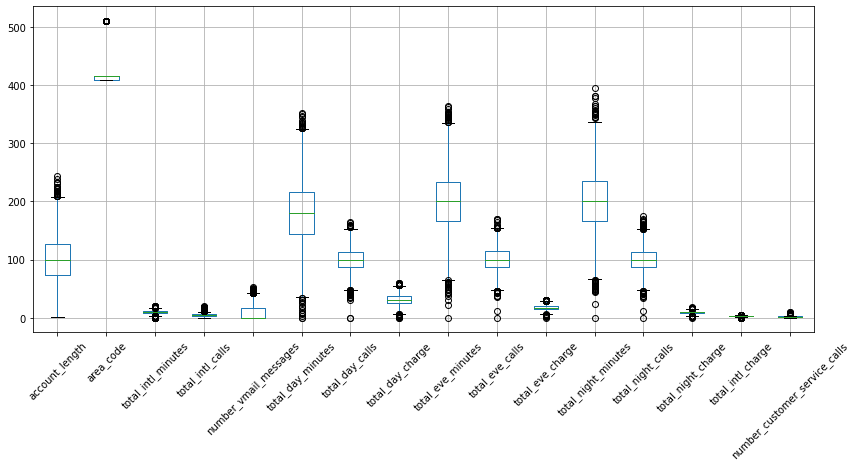

In [18]:
# looking for outliers
num_cols = df.columns.to_list()
num_cols.remove('international_plan')
num_cols.remove('churn')

plt.figure(figsize = (14, 6))
df.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.show()

We see that all the remaining variables have outliers, which we will not drop.

We now save our clean dataset to a new CSV file.

In [19]:
# save the data set to a clean CSV file

df.to_csv('call_center_clean.csv', index = False)

df = pd.read_csv('call_center_clean.csv')
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False


## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [20]:
# get the summary statistics
df.describe()

,account_length,area_code,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,10.261780,4.435200,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,2.771196,1.570400
std,39.69456,42.209182,2.761396,2.456788,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,8.500000,3.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,2.300000,1.000000
50%,100.00000,415.000000,10.300000,4.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,2.780000,1.000000
75%,127.00000,415.000000,12.000000,6.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,3.240000,2.000000
max,243.00000,510.000000,20.000000,20.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,5.400000,9.000000


415    2495
408    1259
510    1246
Name: area_code, dtype: int64


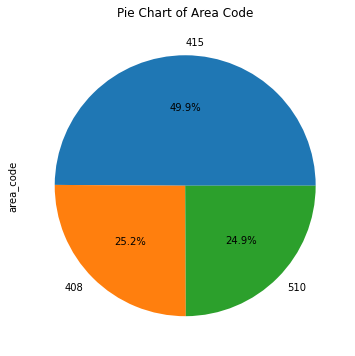

In [21]:
print(df.area_code.value_counts())

plt.figure(figsize = (6, 6))
df.area_code.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of Area Code')
plt.show()

Area Code 415 consists of almost half of the area codes in this dataset. Area Code 510 very slightly outnumbers Area Code 408.

False    4527
True      473
Name: international_plan, dtype: int64


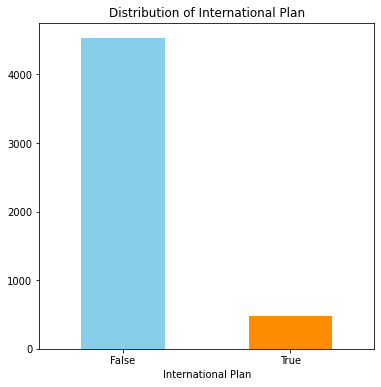

In [22]:
print(df.international_plan.value_counts())

plt.figure(figsize = (6, 6))
df.international_plan.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Distribution of International Plan')
plt.xlabel('International Plan')
plt.show()

Very few of the customers are subscribed to an international plan.

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64


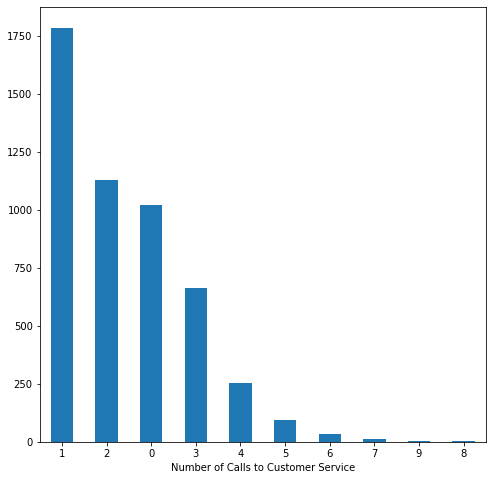

In [23]:
print(df.number_customer_service_calls.value_counts())

plt.figure(figsize = (8, 8))
df.number_customer_service_calls.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel("Number of Calls to Customer Service")
plt.show()

Most customers made exactly 1 call to customer service followed by those who made 2 calls, and then those who made 0 calls. Those who made more than 5 calls make up the minority.

False    4293
True      707
Name: churn, dtype: int64


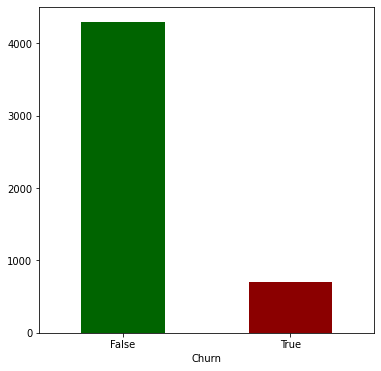

In [24]:
print(df.churn.value_counts())

plt.figure(figsize = (6, 6))
df.churn.value_counts().plot(kind ='bar', rot = 0, color = ['darkgreen', 'darkred'])
plt.xlabel("Churn")
plt.show()

Majority of the customers in this dataset have not churned, thereby making this dataset very biased.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

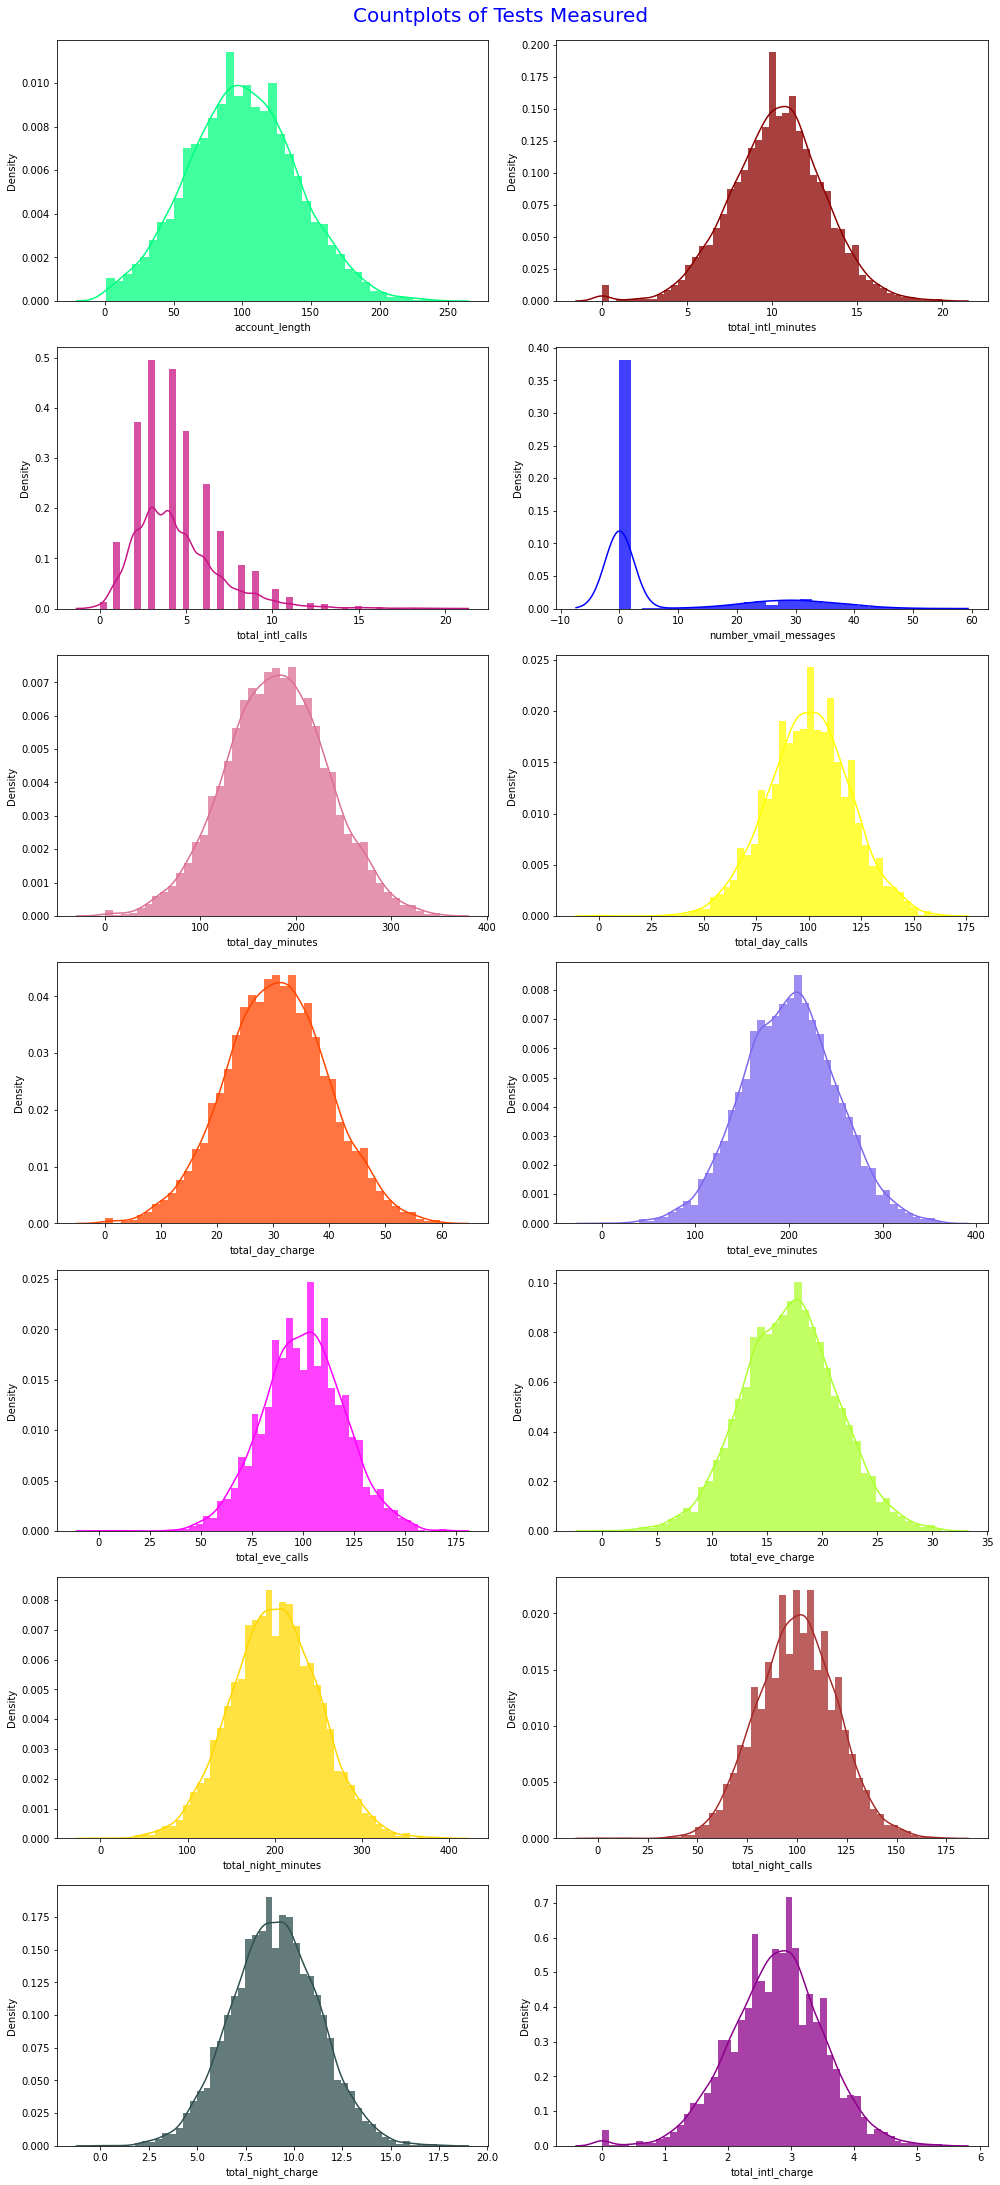

In [25]:
# plotting the histograms of all our numerical variables with the
# exception of 'area_code' and 'number_customer_service_calls'
num_cols.remove('area_code')
num_cols.remove('number_customer_service_calls')

fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (14, 30))
plt.suptitle('Countplots of Tests Measured', fontsize = 20, y = 1.01, color = 'blue')

colors = ['#00FF7F', '#8B0000', '#C71585', '#0000FF', '#DB7093', '#FFFF00', '#FF4500',
          '#7B68EE', '#FF00FF', '#ADFF2F', '#FFD700', '#A52A2A', '#2F4F4F', '#8B008B']
for ax, column, color in zip(axes.flatten(), num_cols, colors):
    sns.distplot(df[column], ax = ax, color = color, hist_kws = dict(alpha = 0.75))
    
plt.tight_layout()

Majority of the numerical variables have normal distributions. Apart from having most of its values in the 0-5 bin, the 'number_vmail_messages' variable appears to be normally distributed. The 'total_intl_calls' variable is skewed to the right and is not continuous.

### 3.2 Bivariata Analysis

We will make 'churn' our target variable and look at how the other variables relate to it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


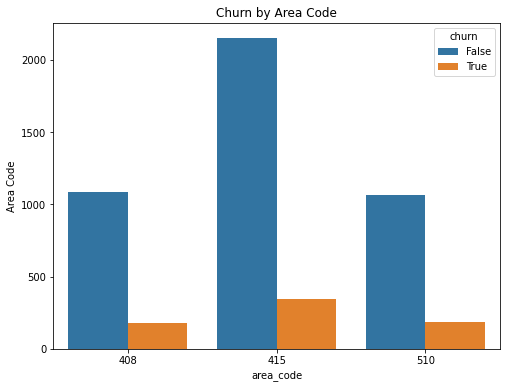

In [26]:
# churn by area code
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('area_code', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by Area Code", ylabel = 'Area Code')
plt.show()

Area code 415 reports the highest churn rates.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


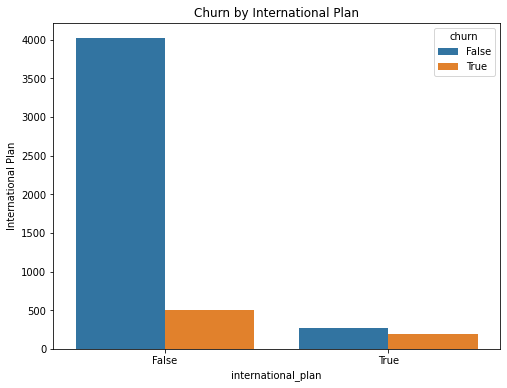

In [27]:
# churn by international plan
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('international_plan', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by International Plan", ylabel = 'International Plan')
plt.show()

Those without international plans churned more than those with international plans.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


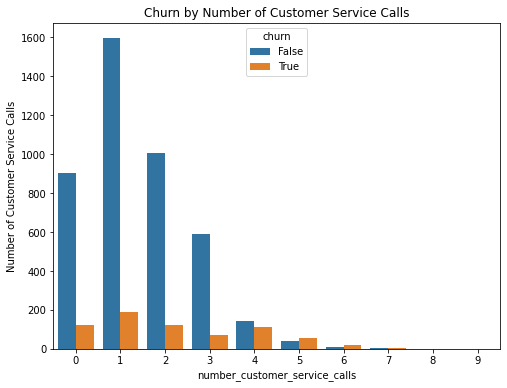

In [28]:
# churn by number of customer service calls
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('number_customer_service_calls', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by Number of Customer Service Calls",
                    ylabel = 'Number of Customer Service Calls')
plt.show()

The interesting thing to note here is that those who made 0 or 2 calls to customer service churned at around the same rate. Similarly, those who made more than 3 calls reported high churn rates.

### 3.3 Feature Engineering & Test for Multicollinearity

Before we can carry out the test for multicollinearity (a requirement for logistic regression), we need to convert the values of 'international_plan' and 'churn' to binary.

In [29]:
df['international_plan'] = df['international_plan'].replace({False : 0, True : 1})
df['churn'] = df['churn'].replace({False : 0, True : 1})
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,0,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,0
1,137,510,0,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,0
2,103,408,0,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,0
3,99,415,0,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,0
4,108,415,0,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,0


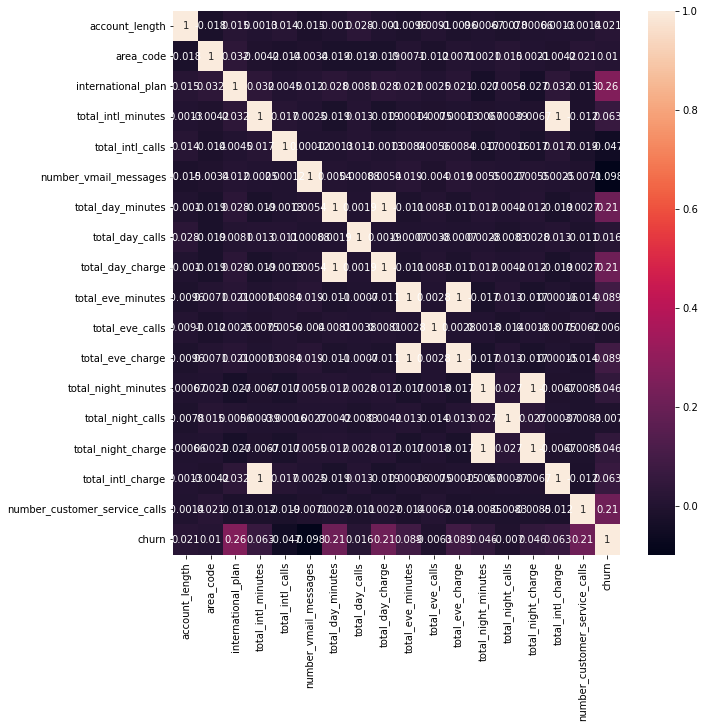

In [30]:
# checking the correlations between the numerical variables
corrMatrix = df.corr()
corrMatrix
# plotting the correlations onto a heatmap
import seaborn as sns
plt.figure(figsize=(10, 10)) 
sns.heatmap(corrMatrix, annot = True) 

We see some perfect correlations between the following variables:
- 'total_day_minutes' and 'total_day_charge'
- 'total_eve_minutes' and 'total_eve_charge'
- 'total_night_minutes' and 'total_night_charge'
- 'total_intl_minutes' and 'total_intl_charge'

We will drop the minutes.

In [31]:
# drop the columns with minutes, e.g., 'total_day_minutes', etc.
df.drop(columns = ['total_intl_minutes', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace = True)
df.head(3)

,account_length,area_code,international_plan,total_intl_calls,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,0,3,0,123,12.05,73,18.01,73,10.62,2.86,3,0
1,137,510,0,7,0,86,38.01,139,20.81,81,4.24,2.57,0,0
2,103,408,0,6,29,95,50.10,105,20.17,127,13.51,3.70,1,0


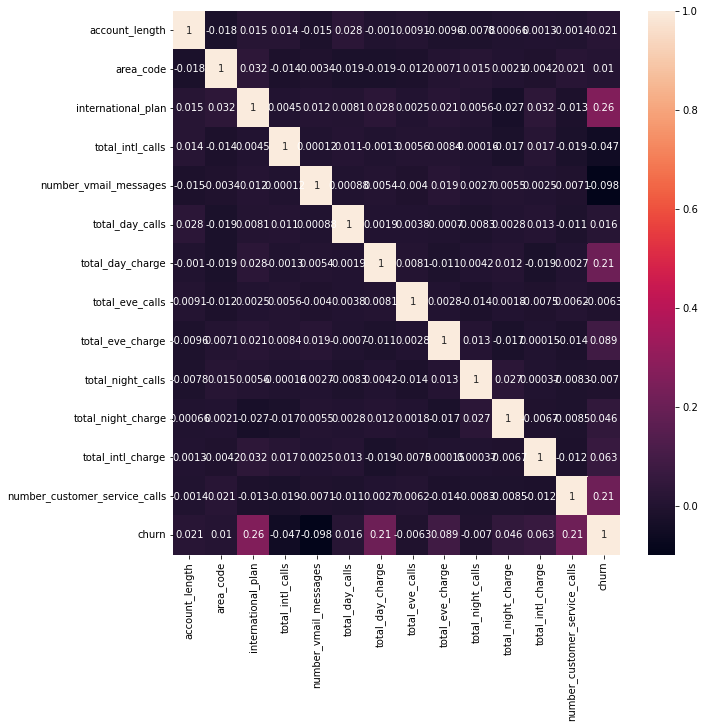

In [32]:
# checking the correlations between the numerical variables
corrMatrix = df.corr()
corrMatrix
# plotting the correlations onto a heatmap
import seaborn as sns
plt.figure(figsize=(10, 10)) 
sns.heatmap(corrMatrix, annot = True)

We will then check the Variance Inflation Factor (VIF) scores to ensure there is no high multicollinearity.

In [67]:
# calculate VIF and plot the heatmap
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame(np.linalg.inv(corrMatrix.values), index = corrMatrix.index, columns=corrMatrix.columns)

,account_length,area_code,international_plan,total_intl_calls,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
account_length,1.002339,0.017673,-0.010015,-0.014693,0.012450,-0.027260,0.006226,-0.008834,0.011535,0.006977,-0.000229,0.001140,0.005276,-0.021385
area_code,0.017673,1.003202,-0.033461,0.012805,0.003942,0.018524,0.020315,0.011966,-0.006338,-0.014171,-0.002932,0.005056,-0.021090,-0.000626
international_plan,-0.010015,-0.033461,1.084081,-0.017236,-0.043582,-0.003098,0.032925,-0.006139,0.008241,-0.008608,0.043584,-0.012542,0.080470,-0.311345
total_intl_calls,-0.014693,0.012805,-0.017236,1.003978,0.005582,-0.010702,-0.010041,-0.004952,-0.013069,0.000063,0.014105,-0.019744,0.006736,0.054839
number_vmail_messages,0.012450,0.003942,-0.043582,0.005582,1.013652,-0.002935,-0.030431,0.005215,-0.030776,-0.000788,-0.012768,-0.009998,-0.020543,0.124942
total_day_calls,-0.027260,0.018524,-0.003098,-0.010702,-0.002935,1.001953,0.002104,-0.003430,0.002250,0.007832,-0.002382,-0.011451,0.013951,-0.018494
total_day_charge,0.006226,0.020315,0.032925,-0.010041,-0.030431,0.002104,1.051936,-0.010298,0.034088,-0.006744,0.001134,0.035844,0.050182,-0.246976
total_eve_calls,-0.008834,0.011966,-0.006139,-0.004952,0.005215,-0.003430,-0.010298,1.000780,-0.004478,0.013634,-0.003016,0.006753,-0.009216,0.012581
total_eve_charge,0.011535,-0.006338,0.008241,-0.013069,-0.030776,0.002250,0.034088,-0.004478,1.012273,-0.014644,0.022569,0.008216,0.037983,-0.113182
total_night_calls,0.006977,-0.014171,-0.008608,0.000063,-0.000788,0.007832,-0.006744,0.013634,-0.014644,1.001672,-0.027912,-0.001170,0.005499,0.011998


We don't see any VIF score of 5 and above, which means our dataset does not have high levels of multicollinearity. We are, therefore, good to go.

## <font color='#2F4F4F'>4. Data Modeling</font>

We will carry out 5 types of classification analysis, namely:
1. Logistic Regression
2. Gaussian Naive Bayes (NB) classification
3. Decision Trees Classification
4. K-Nearest Neighbors (KNN) Classification
5. Support Vector Machine (SVM) Classification

We will then compare the different classification models to assess the best performing one(s).

In [43]:
# dividing our dataset into features (X) and target (y)

x = df.iloc[:, 1:2].values
y = df.iloc[:, 1].values 

In [44]:
y

array([510, 510, 408, ..., 510, 510, 415])

In [45]:
x

array([[510],
       [510],
       [408],
       ...,
       [510],
       [510],
       [415]])

In [46]:
# splitting into 80-20 train-test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [47]:
# performing feature scaling on our training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting and transforming X_train while transforming X_test
from sklearn.preprocessing import MinMaxScaler  
norm = MinMaxScaler().fit(x_train) 
features_train = norm.transform(x_train) 
x_test = norm.transform(x_test)

In [48]:
# loading our classification libraries
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier

In [49]:
# instantiating our classifiers
logistic_classifier = LogisticRegression()
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_classifier = GaussianNB()

In [ ]:
# fitting our classifiers to the training data
logistic_classifier.fit(x_train, y_train)
decision_classifier.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)
naive_classifier.fit(x_train, y_train)

In [54]:
# making predictions
logistic_y_prediction = logistic_classifier.predict(x_test) 
decision_y_prediction = decision_classifier.predict(x_test) 
svm_y_prediction = svm_classifier.predict(x_test) 
knn_y_prediction = knn_classifier.predict(x_test) 
naive_y_prediction = naive_classifier.predict(x_test) 

In [ ]:
# printing the classification report for each classifier to assess performance
from sklearn.metrics import classification_report, accuracy_score 

# classification report for Logistic Regression
print("Logistic Regression classification report:")
print(accuracy_score(logistic_y_prediction, y_test))

# classification report for Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes classification report:")
print(accuracy_score(naive_y_prediction, y_test))

# classification report for Decision Tree Classifier
print("Decision Tree classification report:")
print(accuracy_score(decision_y_prediction, y_test))

# classification report for K-Nearest Neighbors Classifier
print("K-Nearest Neighbors classification report:")
print(accuracy_score(knn_y_prediction, y_test))

# classification report for Support Vector Machine Classifier
print("Support Vector Machine classification report:")
print(accuracy_score(svm_y_prediction, y_test))

WHat have you noticed about the performance of the various models? The models give us the same score of 0.246 which is quite low

## <font color='#2F4F4F'>5. Summary of Findings</font>

Include your findings from the analysis and modeling stages.

## <font color='#2F4F4F'>6. Recommendations</font>

What recommendations can you provide? We could consider hyper parameter tuning to increase the accuracy of our models

## <font color='#2F4F4F'>7. Challenging your Solution</font>

What can you do to improve your project?